## Numerical Computing with Python and Numpy

Suppose we want to use climate data like the temperature, rainfall, and humidity to determine if a region is well suited for growing apples. A simple approach for doing this would be to formulate the relationship between the annual yield of apples (tons per hectare) and the climatic conditions like the average temperature (in degrees Fahrenheit), rainfall (in millimeters) & average relative humidity (in percentage) as a linear equation.

yield_of_apples = w1 * temperature + w2 * rainfall + w3 * humidity

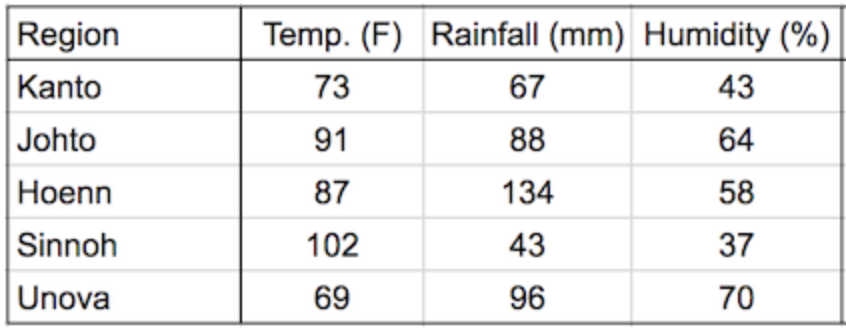

In [1]:
w1, w2, w3 = 0.3, 0.2, 0.5

In [2]:
kanto = [73, 67, 43]
johto = [91, 88, 64]
hoenn = [87, 134, 58]
sinnoh = [102, 43, 37]
unova = [69, 96, 70]

In [3]:
kanto

[73, 67, 43]

In [4]:
weights = [w1,w2,w3]

In [5]:
weights

[0.3, 0.2, 0.5]

In [6]:
#  example of zip
for item in zip(kanto,weights):
    print(item)

(73, 0.3)
(67, 0.2)
(43, 0.5)


In [7]:
def crop_yield(region,weights):
    result = 0
    for x,w in zip(region , weights):
        result += x * w
    return result

In [8]:
crop_yield(kanto,weights)

56.8

In [9]:
!pip install numpy 

Defaulting to user installation because normal site-packages is not writeable


In [10]:
import numpy as np

In [11]:
kanto = np.array([73,67,43])

In [12]:
kanto

array([73, 67, 43])

In [13]:
w1, w2, w3 = 0.3, 0.2, 0.5

In [14]:
weights = np.array([w1,w2,w3])

In [15]:
np.dot(kanto,weights)

56.8

In [16]:
kanto * weights

array([21.9, 13.4, 21.5])

In [17]:
(kanto * weights).sum()

56.8

In [18]:
# check the speed of python or numpy
# Python lists
arr1 = list(range(1000000))
arr2 = list(range(1000000, 2000000))

# Numpy arrays
arr1_np = np.array(arr1)
arr2_np = np.array(arr2)

In [19]:
%%time
result = 0
for x1, x2 in zip(arr1, arr2):
    result += x1*x2
result

CPU times: total: 78.1 ms
Wall time: 262 ms


833332333333500000

In [20]:
%%time
np.dot(arr1_np, arr2_np)

CPU times: total: 0 ns
Wall time: 986 µs


-1942957984

### Multi-dimensional Numpy arrays

In [21]:
climate_data = np.array([[73, 67, 43],
                         [91, 88, 64],
                         [87, 134, 58],
                         [102, 43, 37],
                         [69, 96, 70]])

In [22]:
climate_data

array([[ 73,  67,  43],
       [ 91,  88,  64],
       [ 87, 134,  58],
       [102,  43,  37],
       [ 69,  96,  70]])

In [23]:
# 2D array(matrix)
climate_data.shape

(5, 3)

In [24]:
weights

array([0.3, 0.2, 0.5])

In [25]:
# 1D array (matrix)
weights.shape

(3,)

In [26]:
# 3D array 
arr3 = np.array([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.5]]])

In [27]:
arr3.shape

(2, 2, 3)

In [28]:
arr3.dtype

dtype('float64')

In [29]:
weights.dtype

dtype('float64')

In [30]:
climate_data.dtype


dtype('int32')

### We can use the np.matmul function or the @ operator to perform matrix multiplication.

In [31]:
np.matmul(climate_data, weights)

array([56.8, 76.9, 81.9, 57.7, 74.9])

In [32]:
climate_data @ weights

array([56.8, 76.9, 81.9, 57.7, 74.9])

### Working with CSV (comma-separated values) data files

In [33]:
import urllib.request

urllib.request.urlretrieve(
    'https://gist.github.com/BirajCoder/a4ffcb76fd6fb221d76ac2ee2b8584e9/raw/4054f90adfd361b7aa4255e99c2e874664094cea/climate.csv', 
    'climate.txt')

('climate.txt', <http.client.HTTPMessage at 0x29dce45fda0>)

In [34]:
climate_data = np.genfromtxt('climate.txt', delimiter=',', skip_header=1)

In [35]:
climate_data

array([[25., 76., 99.],
       [39., 65., 70.],
       [59., 45., 77.],
       ...,
       [99., 62., 58.],
       [70., 71., 91.],
       [92., 39., 76.]])

In [36]:
climate_data.shape

(10000, 3)

In [37]:
weights = np.array([0.3, 0.2, 0.5])

In [38]:
yields = climate_data @ weights

In [39]:
yields

array([72.2, 59.7, 65.2, ..., 71.1, 80.7, 73.4])

In [40]:
yields.shape

(10000,)

In [41]:
climate_results = np.concatenate((climate_data, yields.reshape(10000,1)), axis = 1)

In [42]:
climate_results

array([[25. , 76. , 99. , 72.2],
       [39. , 65. , 70. , 59.7],
       [59. , 45. , 77. , 65.2],
       ...,
       [99. , 62. , 58. , 71.1],
       [70. , 71. , 91. , 80.7],
       [92. , 39. , 76. , 73.4]])

In [43]:
np.savetxt('climate_results.txt', 
           climate_results, 
           fmt='%.2f', 
           delimiter=',',
           header='temperature,rainfall,humidity,yeild_apples', 
           comments=' ')

#### Mathematics: np.sum, np.exp, np.round, arithemtic operators
#### Array manipulation: np.reshape, np.stack, np.concatenate, np.split
#### Linear Algebra: np.matmul, np.dot, np.transpose, np.eigvals
#### Statistics: np.mean, np.median, np.std, np.max

In [44]:
import numpy as np

In [45]:
arr2 = np.array([[1, 2, 3, 4], 
                 [5, 6, 7, 8], 
                 [9, 1, 2, 3]])

In [46]:
arr3 = np.array([[11, 12, 13, 14], 
                 [15, 16, 17, 18], 
                 [19, 11, 12, 13]])

In [47]:
arr2 + arr3

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 12, 14, 16]])

In [48]:
arr2 + 3

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12,  4,  5,  6]])

In [49]:
arr3 - arr2

array([[10, 10, 10, 10],
       [10, 10, 10, 10],
       [10, 10, 10, 10]])

In [50]:
arr2 * arr3

array([[ 11,  24,  39,  56],
       [ 75,  96, 119, 144],
       [171,  11,  24,  39]])

In [51]:
arr2 / 2

array([[0.5, 1. , 1.5, 2. ],
       [2.5, 3. , 3.5, 4. ],
       [4.5, 0.5, 1. , 1.5]])

In [52]:
arr2 % 4

array([[1, 2, 3, 0],
       [1, 2, 3, 0],
       [1, 1, 2, 3]], dtype=int32)

In [53]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [9, 1, 2, 3]])

In [54]:
arr2.shape

(3, 4)

In [55]:
arr4 = np.array([4,5,6,7])

In [56]:
arr4.shape

(4,)

In [57]:
arr2 + arr4


array([[ 5,  7,  9, 11],
       [ 9, 11, 13, 15],
       [13,  6,  8, 10]])

When the expression arr2 + arr4 is evaluated, arr4 (which has the shape (4,)) is replicated three times to match the shape (3, 4) of arr2. Numpy performs the replication without actually creating three copies of the smaller dimension array, thus improving performance and using lower memory.
##### Broadcasting only works if one of the arrays can be replicated to match the other array's shape.


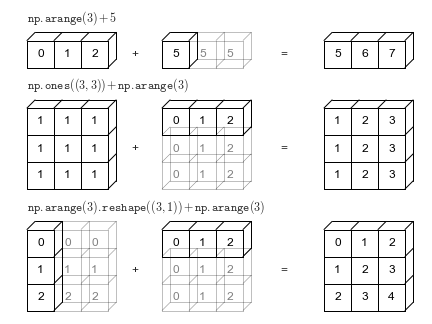

In [58]:
arr5 = np.array([7,8])

In [59]:
arr5.shape

(2,)

In [60]:
arr5_replicated = np.array([[7,8],
                           [7,8],
                           [7,8]])
# it's match with row of line 3 but column 4 is not match

In [61]:
arr2 + arr5

ValueError: operands could not be broadcast together with shapes (3,4) (2,) 

In [62]:
arr2 + arr5_replicated

ValueError: operands could not be broadcast together with shapes (3,4) (3,2) 

In [63]:
arr1 = np.array([[1, 2, 3], [3, 4, 5]])
arr2 = np.array([[2, 2, 3], [1, 2, 5]])

In [64]:
arr1 ==  arr2

array([[False,  True,  True],
       [False, False,  True]])

In [65]:
(arr1 == arr2).dtype

dtype('bool')

In [66]:
arr1 != arr2

array([[ True, False, False],
       [ True,  True, False]])

In [67]:
arr1 >= arr2

array([[False,  True,  True],
       [ True,  True,  True]])

In [68]:
(arr1 == arr2).sum()

3

In [69]:
arr3 = np.array([
    [[11, 12, 13, 14], 
     [13, 14, 15, 19]], 
    
    [[15, 16, 17, 21], 
     [63, 92, 36, 18]], 
    
    [[98, 32, 81, 23],      
     [17, 18, 19.5, 43]]])

In [70]:
arr3.shape

(3, 2, 4)

In [71]:
# single elemnet 
arr3[1,1,2]

36.0

In [72]:
# subarray using ranges
arr3[1:,0:1,:2]

array([[[15., 16.]],

       [[98., 32.]]])

In [73]:
# mixing indicies and ranges
arr3[1:,1,:3]

array([[63. , 92. , 36. ],
       [17. , 18. , 19.5]])

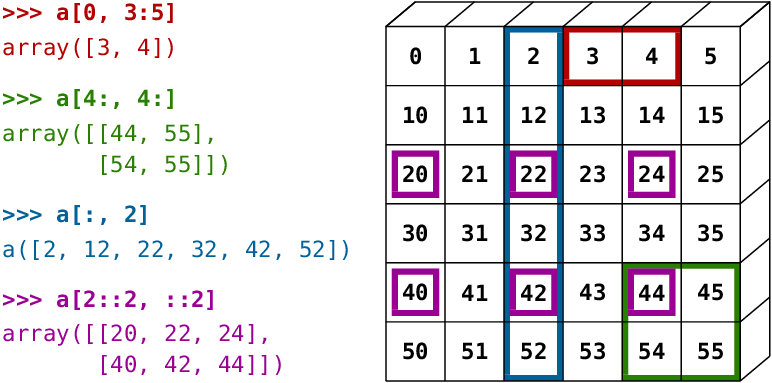

In [74]:
# all zeros
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [75]:
# All ones
np.ones([2, 2, 3])

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

In [76]:
# Identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [77]:
# Random vector
np.random.rand(5)
# take from 0-1

array([0.3678711 , 0.17260034, 0.94808618, 0.96980503, 0.40614557])

In [78]:
# Random matrix
np.random.randn(2, 3) # rand vs. randn - what's the difference?
# guss method use and any value take of mean of zero |etc....

array([[-1.71899873,  1.55688603,  2.01733262],
       [-1.79338537, -1.15308419, -0.33629755]])

In [79]:
# Fixed value
np.full([2, 3], 42)

array([[42, 42, 42],
       [42, 42, 42]])

In [80]:
# Fixed value
np.full([2, 3], 42)

array([[42, 42, 42],
       [42, 42, 42]])

In [81]:
np.arange(10,90,3).reshape(3,3,3)

array([[[10, 13, 16],
        [19, 22, 25],
        [28, 31, 34]],

       [[37, 40, 43],
        [46, 49, 52],
        [55, 58, 61]],

       [[64, 67, 70],
        [73, 76, 79],
        [82, 85, 88]]])

In [82]:
# Equally spaced numbers in a range
np.linspace(3, 27, 9)

array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.])

In [83]:
np.sin(np.pi/2.)

1.0

In [84]:
np.sin(np.array((0., 30., 45., 60., 90.)) * np.pi / 180. )

array([0.        , 0.5       , 0.70710678, 0.8660254 , 1.        ])

In [1]:
import os

In [2]:
os.getcwd()

'D:\\jupyter_try'

In [3]:
os.listdir('.')

['.ipynb_checkpoints',
 'climate.txt',
 'climate_results.txt',
 'Numpy_basic.ipynb',
 'python_basic_2.ipynb',
 'python_practice.ipynb']